# Notebook to process a low-speed video for better tracking in KindaFly

Specifically want to downsample to get better 'smear' of wing envelope

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import os
import glob
import cv2

import numpy as np
import matplotlib.pyplot as plt

from skimage.color import label2rgb, rgb2gray
from skimage.util import invert, compare_images, img_as_float

from mosquito.get_wing_kinematics import load_video_data

## Params

In [8]:
plt.style.use('dark_background')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize for x tick labels
plt.rc('ytick', labelsize=14)    # fontsize for y tick labels

## Load data

In [9]:
# example video
# info for file to load
data_folder = 52 #  48 # 46
axo_num = 5
frame_range = (0, 500)
return_cap_flag = False

# imgs, metadata = load_video_data(data_folder, axo_num, frame_range=frame_range, return_cap_flag=return_cap_flag)

## Want a way to do this with video capture













In [10]:
# load a video
cap, metadata = load_video_data(data_folder, axo_num, frame_range=None, return_cap_flag=True)

# params for weighted sum
alpha = 0.5  # 0.5  # weight multiplied by 1st image
beta = 0.7  # 0.7  # weight multiplied by 2nd image
gamma = 0.0  # image gamma value

# initialize variables so we can look at frame previous
ret, frame_pprev = cap.read()
ret, frame_prev = cap.read()

# create a videowriter object for output
data_path_full = metadata['filepath']
data_path_no_ext, ext = os.path.splitext(data_path_full)
save_path = f'{data_path_no_ext}_processed{ext}'
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))  
fps = int(cap.get(cv2.CAP_PROP_FPS))
vid_writer = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc('M','J','P','G'), fps, frame_size)

# write first frame the same, just so we don't have unequal video lengths
vid_writer.write(frame_pprev)
vid_writer.write(frame_prev)

# loop over images
while True:
    # current image
    ret, frame = cap.read()
    if not ret:
        break

    # # convert to grayscale
    # im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # do summation of image and previous
    frame_sum = ~cv2.addWeighted(~frame_pprev, alpha, ~frame_prev, beta, gamma)
    frame_sum = ~cv2.addWeighted(~frame_sum, alpha, ~frame, beta, gamma)
    
    # write image to new file
    vid_writer.write(frame_sum)
    
    # reassign current frame to previous
    frame_pprev = frame_prev
    frame_prev = frame
        
cap.release()
vid_writer.release()

/home/sam/Documents/code/mosquito/src/mosquito/read_photron.py:168: UserWarning: Not 12bit (8 bits)! clipped values?
  warnings.warn('Not 12bit ({:g} bits)! clipped values?'.format(bits))


## Make a downsampled/smeared video for each video in expr 50

In [6]:
def downsample_vid(data_folder, axo_num, alpha=0.5, beta=0.7, gamma=0.0):
    # load a video
    cap, metadata = load_video_data(data_folder, axo_num, frame_range=None, return_cap_flag=True)
    
    # # params for weighted sum
    # alpha = 0.5  # 0.5  # weight multiplied by 1st image
    # beta = 0.7  # 0.7  # weight multiplied by 2nd image
    # gamma = 0.0  # image gamma value
    
    # initialize variables so we can look at frame previous
    ret, frame_pprev = cap.read()
    ret, frame_prev = cap.read()
    
    # create a videowriter object for output
    data_path_full = metadata['filepath']
    data_path_no_ext, ext = os.path.splitext(data_path_full)
    save_path = f'{data_path_no_ext}_processed{ext}'
    frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))  
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    vid_writer = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc('M','J','P','G'), fps, frame_size)
    
    # write first frame the same, just so we don't have unequal video lengths
    vid_writer.write(frame_pprev)
    vid_writer.write(frame_prev)
    
    # loop over images
    while True:
        # current image
        ret, frame = cap.read()
        if not ret:
            break
    
        # # convert to grayscale
        # im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
        # do summation of image and previous
        frame_sum = ~cv2.addWeighted(~frame_pprev, alpha, ~frame_prev, beta, gamma)
        frame_sum = ~cv2.addWeighted(~frame_sum, alpha, ~frame, beta, gamma)
        
        # write image to new file
        vid_writer.write(frame_sum)
        
        # reassign current frame to previous
        frame_pprev = frame_prev
        frame_prev = frame
            
    cap.release()
    vid_writer.release()
    

In [16]:
# # temp: get speed of all videos
# data_folders = np.arange(44, 50)
# for data_folder in data_folders:
#     for n_axo in np.arange(20):
#         try:
#             _, metadata = load_video_data(data_folder, n_axo, just_return_fps_flag=True)
                
#         except ValueError:
#             continue
    
#         if metadata['record_fps'] < 1000:
#             print(f'processing expr {data_folder}, axo {n_axo}...')
#             downsample_vid(data_folder, n_axo)
#             print(f'completed expr {data_folder}, axo {n_axo}')

# print('Done!')


/home/sam/Documents/code/mosquito/src/mosquito/read_photron.py:180: UserWarning: Clipped footage! (Total frame: 5458, Orig. total frame: 13973)
  warnings.warn('Clipped footage! (Total frame: {}, Orig. total frame: {})'.format(cih['Total Frame'],
/home/sam/Documents/code/mosquito/src/mosquito/read_photron.py:180: UserWarning: Clipped footage! (Total frame: 100, Orig. total frame: 13973)
  warnings.warn('Clipped footage! (Total frame: {}, Orig. total frame: {})'.format(cih['Total Frame'],


processing expr 48, axo 0...
completed expr 48, axo 0
processing expr 49, axo 0...
completed expr 49, axo 0
processing expr 49, axo 2...
completed expr 49, axo 2
Done!


## First try a windowed average approach

In [10]:
# covnert images to grayscale
import time

start = time.time()
imgs_gray = np.stack([(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) for img in imgs])
# for ith in range(imgs.shape[0]):
#     imgs_gray.append(cv2.cvtColor(imgs[ith], cv2.COLOR_BGR2GRAY))
# imgs_gray = np.stack(imgs_gray)
end = time.time()
print('time for opencv option: ', end - start)

# start = time.time()
# imgs_gray2 = rgb2gray(imgs)
# end = time.time()
# print('time for skimage option: ', end - start)


time for opencv option:  0.16446661949157715


Text(0.5, 1.0, 'sum')

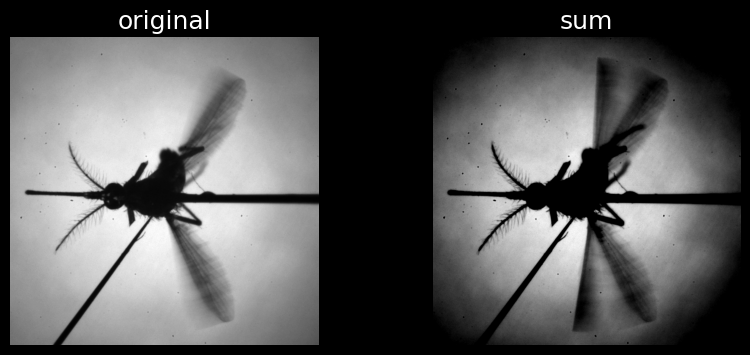

In [25]:
# pick a frame to test
ind = 29

img_sum = cv2.add(~imgs_gray[ind-1], ~imgs_gray[ind])

# visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.imshow(imgs_gray[ind], cmap='grey')
ax1.set_axis_off()
ax1.set_title('original')

ax2.imshow(~img_sum, cmap='grey')
ax2.set_axis_off()
ax2.set_title('sum')

In [42]:
# look across frames
window_name = 'test image add'
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)

for ith in range(1, imgs_gray.shape[0]):
    img = imgs_gray[ith]
    img_sum = ~cv2.addWeighted(~imgs_gray[ith-1], 0.5, ~img, 0.7, 0.0)
    cv2.imshow(window_name, np.hstack((img, img_sum)))

    k = cv2.waitKey(0) & 0xff  
    
    if k == 27:
        break

cv2.destroyAllWindows()

In [54]:
metadata.keys()

dict_keys(['fps', 'n_frames'])

In [ ]:
# # load a video
# cap, metadata = load_video_data(data_folder, axo_num, frame_range=None, return_cap_flag=True)

# # params for weighted sum
# alpha = 0.7  # 0.5  # weight multiplied by 1st image
# beta = 0.8  # 0.7  # weight multiplied by 2nd image
# gamma = 0.0  # image gamma value

# # initialize variables so we can look at frame previous
# ret, frame_prev = cap.read()

# # create a videowriter object for output
# data_path_full = metadata['filepath']
# data_path_no_ext, ext = os.path.splitext(data_path_full)
# save_path = f'{data_path_no_ext}_processed{ext}'
# frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)), int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))  
# fps = int(cap.get(cv2.CAP_PROP_FPS))
# vid_writer = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc('M','J','P','G'), fps, frame_size)

# # write first frame the same, just so we don't have unequal video lengths
# vid_writer.write(frame_prev)

# # loop over images
# while True:
#     # current image
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # # convert to grayscale
#     # im = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # do summation of image and previous
#     frame_sum = ~cv2.addWeighted(~frame_prev, alpha, ~frame, beta, gamma)

#     # write image to new file
#     vid_writer.write(frame_sum)
    
#     # reassign current frame to previous
#     frame_prev = frame
        
# cap.release()
# vid_writer.release()